In [1]:
# Imports 
import jeans

import numpy as np
import matplotlib.pyplot as plt

The jeans model solves for the one-dimensional, $\bar{\rho}_{DM}(r)$, and two-dimensional, $\rho_{DM}(R, z)$, dark matter density profiles. This notebook shows examples for accessing the densities for spherical and non-spherical SIDM profiles and a nonspherical CDM profile. 

In [2]:
# Examples profiles
rm = 10.0 # kpc
M200 = 1e12 # Msun
c = 10.0 # dimensionless
q0 = 0.6
AC_inputs = {'AC_prescription': 'Cautun'}

# Example baryonic potential: Miyamoto-Nagai disk
def Phi_b(r, th):
    GN = 4.302e-6 # gravitational constant in kpc (km/s)^2 Msun^-1
    Md = 6.4e10
    a = 3.5
    b = 0.53
    return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

# spherical jeans profile with NFW out halo 
profile_spherical = jeans.spherical(rm, M200, c, Phi_b=Phi_b, **AC_inputs)

# squashed profile
profile_squashed = jeans.squashed(rm, M200, c, q0=q0, Phi_b=Phi_b, **AC_inputs)

# cdm profile
profile_cdm = jeans.cdm(M200, c, q0=q0, Phi_b=Phi_b, **AC_inputs) 

# One-dimensional densities

The spherically averaged density profiles are accessed via the rho_sph_avg method which takes in positive r grid in kpc and returns the density in units Msun/kpc^3

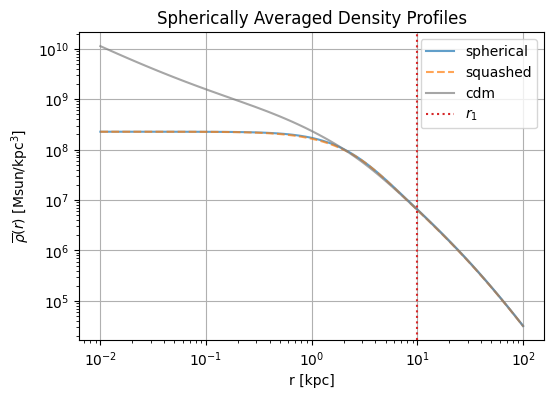

In [5]:
r_list = np.logspace(-2, 2, 100) # kpc

plt.figure(figsize=(6,4))
plt.loglog(r_list, profile_spherical.rho_sph_avg(r_list), label='spherical', color='C0', ls='-', alpha=0.7)
plt.loglog(r_list, profile_squashed.rho_sph_avg(r_list), label='squashed', color='C1', ls='--', alpha=0.7)
plt.loglog(r_list, profile_cdm.rho_sph_avg(r_list), label='cdm', color='grey', ls='-', alpha=0.7)
plt.axvline(rm, color='C3', ls=':', label=r'$r_1$')
plt.xlabel('r [kpc]')
plt.ylabel(r'$\overline{\rho} (r)$ [Msun/kpc$^3$]')
plt.title('Spherically Averaged Density Profiles')
plt.legend()
plt.grid()
plt.show()

Note that the full CDM profile is contained in the profile class for an SIDM halo. You can access its density using the rho_sph_avg method of the profile.outer attribute (which instantiates the CDM_profile class). 

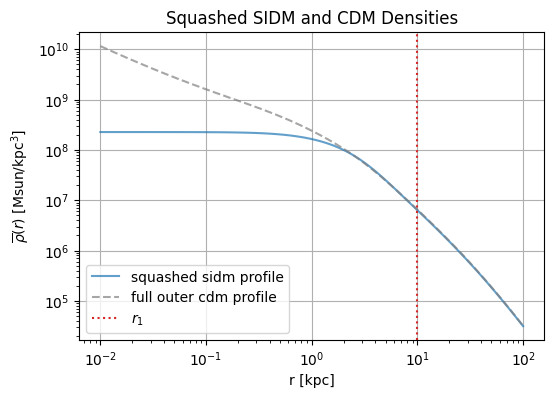

In [25]:
r_list = np.logspace(-2, 2, 100) # kpc

plt.figure(figsize=(6,4))
plt.loglog(r_list, profile_squashed.rho_sph_avg(r_list), label='squashed sidm profile', color='C0', ls='-', alpha=0.7)
plt.loglog(r_list, profile_squashed.outer.rho_sph_avg(r_list), label='full outer cdm profile', color='grey', ls='--', alpha=0.7)
plt.axvline(rm, color='C3', ls=':', label=r'$r_1$')
plt.xlabel('r [kpc]')
plt.ylabel(r'$\overline{\rho} (r)$ [Msun/kpc$^3$]')
plt.title('Squashed SIDM and CDM Densities')
plt.legend()
plt.grid()
plt.show()

# Two-dimensional densities 

One may also plot the 2D density profiles using the built-in method rho_cyl_array over a grid in R, z. 

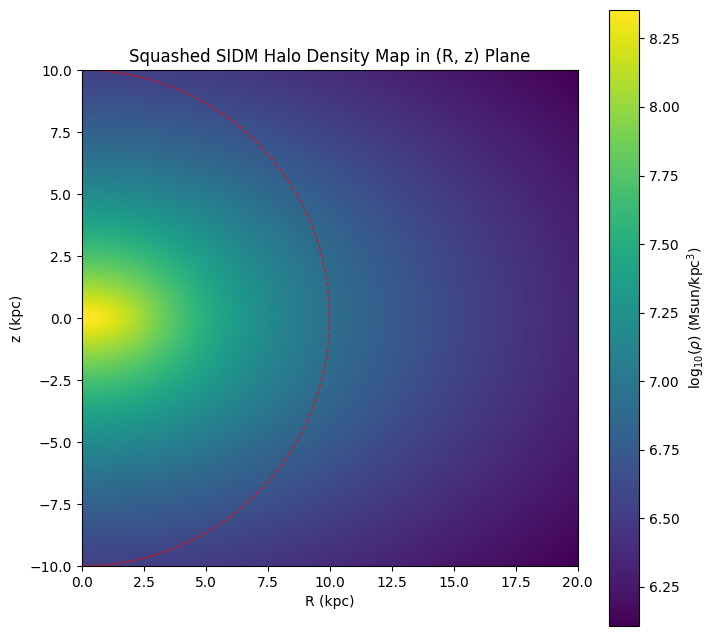

In [11]:
R_list = np.linspace(0, 20, num=200)
z_list = np.linspace(-10, 10, num=200)
R, Z = np.meshgrid(R_list, z_list, indexing='xy')
r_sph = np.sqrt(R**2 + Z**2)

rho_2D = profile_squashed.rho_cyl_array(R_list, z_list)

extent = [R_list.min(), R_list.max(), z_list.min(), z_list.max()]

plt.figure(figsize=(8,8))
plt.imshow(np.log10(rho_2D.T), origin='lower', extent=extent, aspect='auto', cmap='viridis')
cbar = plt.colorbar()
cbar.set_label(r'log$_{10}(\rho)$ (Msun/kpc$^3$)')
plt.contour(R, Z, r_sph, levels=[profile_squashed.r1], colors='red', linestyles='--', linewidths=1, alpha=0.7)
plt.xlabel('R (kpc)')
plt.ylabel('z (kpc)')
plt.title('Squashed SIDM Halo Density Map in (R, z) Plane')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Where the matchin surface is shown by a red dashed contour (i.e. r1).

With iso-density contours

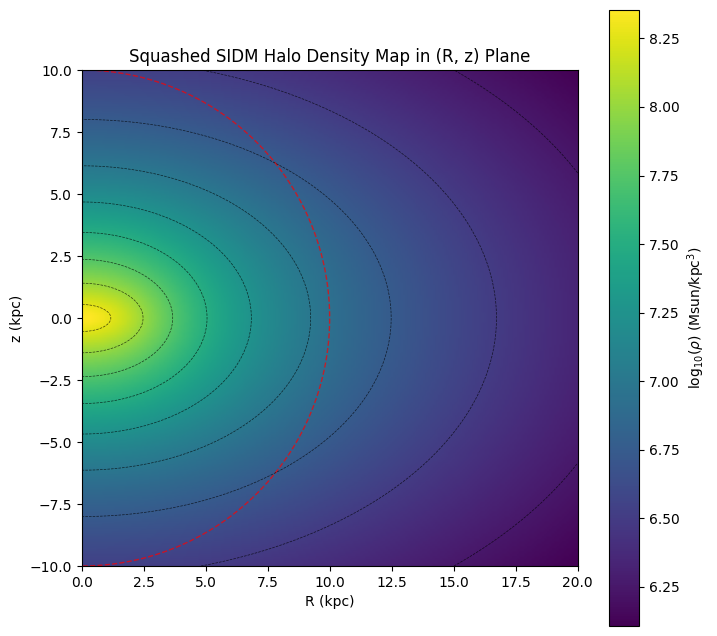

In [12]:
R_list = np.linspace(0, 20, num=200)
z_list = np.linspace(-10, 10, num=200)
R, Z = np.meshgrid(R_list, z_list, indexing='xy')
r_sph = np.sqrt(R**2 + Z**2)

rho_2D = profile_squashed.rho_cyl_array(R_list, z_list)

extent = [R_list.min(), R_list.max(), z_list.min(), z_list.max()]

plt.figure(figsize=(8,8))
plt.imshow(np.log10(rho_2D.T), origin='lower', extent=extent, aspect='auto', cmap='viridis')
cbar = plt.colorbar()
cbar.set_label(r'log$_{10}(\rho)$ (Msun/kpc$^3$)')
plt.contour(R, Z, r_sph, levels=[profile_squashed.r1], colors='red', linestyles='--', linewidths=1, alpha=0.7)
plt.contour(R, Z, np.log10(rho_2D.T), levels=10, colors='k', linewidths=0.5, linestyles='--', alpha=0.7)
plt.xlabel('R (kpc)')
plt.ylabel('z (kpc)')
plt.title('Squashed SIDM Halo Density Map in (R, z) Plane')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Or, to generate plots consistent with those shown in the accompanying paper:

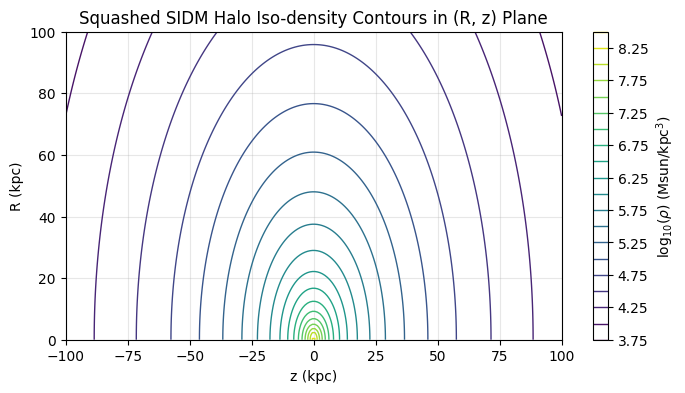

In [24]:
R_list = np.linspace(0, 100, num=200)
z_list = np.linspace(-100, 100, num=200)
R, Z = np.meshgrid(R_list, z_list, indexing='xy')

rho_2D = profile_squashed.rho_cyl_array(R_list, z_list)

extent = [R_list.min(), R_list.max(), z_list.min(), z_list.max()]

plt.figure(figsize=(8,4))

plt.contour(Z, R, np.log10(rho_2D.T), levels=20, cmap='viridis', linestyles='-', linewidths=1, alpha=1.0)
cbar = plt.colorbar()
cbar.set_label(r'log$_{10}(\rho)$ (Msun/kpc$^3$)')
plt.xlabel('z (kpc)')
plt.ylabel('R (kpc)')
plt.title('Squashed SIDM Halo Iso-density Contours in (R, z) Plane')
plt.grid(alpha=0.3)
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()